In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from scipy import stats
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from arch import arch_model
from tbats import BATS, TBATS
from sklearn.metrics import mean_squared_error

In [30]:
consump_g = pd.read_csv("C:/Users/arito/Documents/DePaul/DSC672/Daily Aggregated Files/consump_agg_sectors/consump_g_daily_agg.csv")

In [31]:
consump_g['Date_Time'] = pd.to_datetime(consump_g['Date_Time'])
consump_g_ind = consump_g.set_index('Date_Time')

Text(0, 0.5, 'Electricity (kW/Hr)')

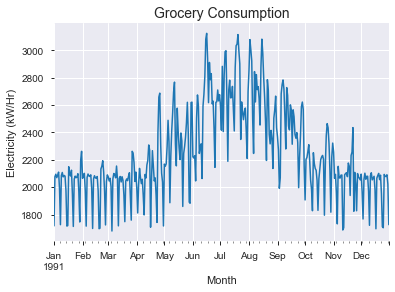

In [32]:
consump_g_ind['Electricity_KW_AVG'].plot(linewidth=1.5)
plt.title('Grocery Consumption', fontsize=14)
plt.xlabel("Month")
plt.ylabel("Electricity (kW/Hr)")

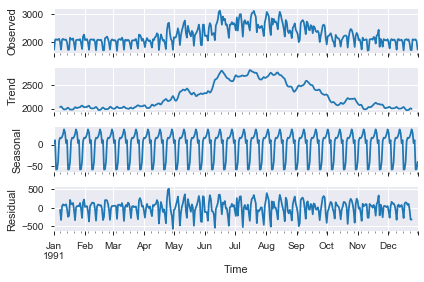

In [6]:
result = seasonal_decompose(consump_g_ind['Electricity_KW_AVG'], freq=12)
result.plot()
plt.xlabel("Time")
pyplot.show()

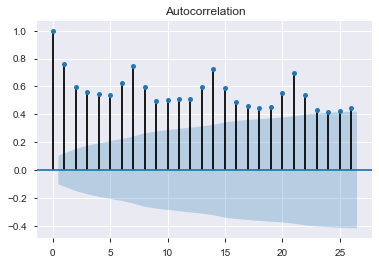

In [7]:
sm.graphics.tsa.plot_acf(consump_g_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

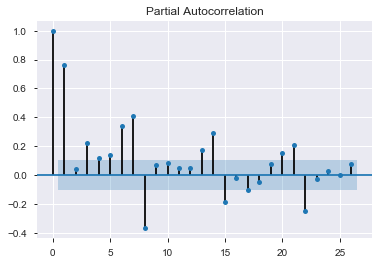

In [8]:
sm.graphics.tsa.plot_pacf(consump_g_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

In [10]:
consump_g_time = consump_g.iloc[:,0:2]
consump_g_time.head()

,Date_Time,Electricity_KW_AVG
0,1991-01-01,1717.374529
1,1991-01-02,2076.449102
2,1991-01-03,2094.777456
3,1991-01-04,2069.682621
4,1991-01-05,2087.470364


In [11]:
consump_g_x = consump_g.iloc[:,2:]
consump_g_x.head()

,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_15,Day_20,Day_23,Day_24,Day_29,Day_of_week_1,Day_of_week_2,Day_of_week_5,Day_of_week_6,Season_Autumn
0,1,1,0,-18.476732,0.950000,-12.883333,5.208333,-9.441667,8.470833,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,-18.411217,0.458333,-14.670833,4.833333,-9.570833,16.100000,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,-18.339779,0.583333,-11.320833,5.583333,-4.670833,16.100000,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-18.262442,0.862500,-13.825000,5.083333,-10.016667,8.725000,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,-18.179237,0.554167,-20.070833,3.833333,-16.716667,10.675000,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
train_time = np.array(consump_g_time.Electricity_KW_AVG[0:292])
test_time = np.array(consump_g_time.Electricity_KW_AVG[292:])
train_exo = np.array(consump_g_x[0:292])
test_exo = np.array(consump_g_x[292:])

In [22]:
#estimator = TBATS(seasonal_periods=(7, 365.25))
#model = estimator.fit(train_time)
#y_forecast = model.forecast(steps=73)

In [38]:
model = SARIMAX(train_time, exog=train_exo, order=(2, 1, 2), trend='ct', seasonal_order=(0, 0, 0, 0))

In [39]:
model_fit = model.fit(disp=True)

C:\Users\arito\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
fc = model_fit.forecast(73, alpha=0.05, exog = pd.DataFrame(test_exo))
fc

array([2235.23175958, 2231.15957009, 1805.31401196, 2103.10606442,
       2319.09859177, 2446.29258442, 2430.73379926, 2350.14724134,
       2148.34803637, 1805.53610766, 2222.8506572 , 2329.58943063,
       2256.6396098 , 2061.83653718, 2079.67131107, 1975.0445872 ,
       1750.10559231, 2173.65891759, 2064.88031379, 2046.20242141,
       2016.89133741, 1766.34377172, 1868.11965891, 1603.46816172,
       2015.30037692, 2080.44951419, 2148.75337226, 2069.82103177,
       2267.85115135, 2230.7768997 , 1976.71109012, 2255.95275989,
       2312.45741935, 2470.525796  , 1859.97385126, 2151.34542786,
       2072.17055053, 1847.89967148, 2104.89248913, 2040.14516578,
       1972.91481092, 2003.38908077, 2068.84681175, 1807.94018054,
       1751.93129875, 1975.95351391, 2095.51256074, 2079.07091627,
       2100.80033986, 2038.20516841, 1804.36246833, 1500.08469172,
       1971.75682148, 2125.69968977, 2091.67114043, 2090.34965865,
       2203.26841533, 2031.27787118, 1708.91555935, 2036.82717

In [41]:
actual = pd.DataFrame(test_time)
actual.index = consump_g_time[292:].index
forecast = pd.DataFrame(fc)
forecast.index = actual.index

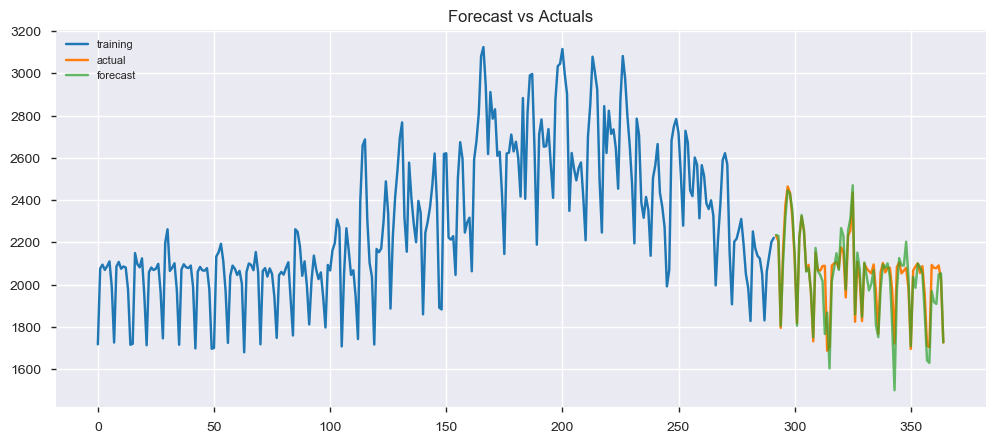

In [42]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_time, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.7)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [43]:
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
print(rmse)
from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast.values)
print(r2)

79.21741138515814
0.8132564425492552
